In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\rudra\Desktop\sql project\dataset\pizza_sales\pizzas.csv")
data.head(2)

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75


In [3]:
data1=pd.read_excel(r"C:\Users\rudra\Desktop\sql project\dataset\pizza_sales\pizza_types.xlsx")
data1.head(2)

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."


In [4]:
data2=pd.read_csv(r"C:\Users\rudra\Desktop\sql project\dataset\pizza_sales\orders.csv")
data2.head(2)

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40


In [5]:
data3=pd.read_csv(r"C:\Users\rudra\Desktop\sql project\dataset\pizza_sales\order_details.csv")
data3.head(2)

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1


In [12]:
dataset=pd.merge(data2,data3,left_on='order_id',right_on='order_id',how='inner')
dataset=pd.merge(dataset,data,left_on='pizza_id',right_on='pizza_id',how='inner')
dataset=pd.merge(dataset,data1,left_on='pizza_type_id',right_on='pizza_type_id',how='inner')
dataset.head(2)

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."


In [13]:
dataset['total']=dataset['price']*dataset['quantity']
dataset.head(2)

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,total
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00


## Top 3 most ordered pizza types based on revenue for each pizza category

In [14]:
import pyodbc
driver='SQL SERVER'
server='Rudra\SQLEXPRESS'
db='Pizza_dataset'
conn=f'''
       driver={driver};
       server={server};
       database={db};
       Trust_Connection=yes;
'''
conn=pyodbc.connect(conn)
print(conn)

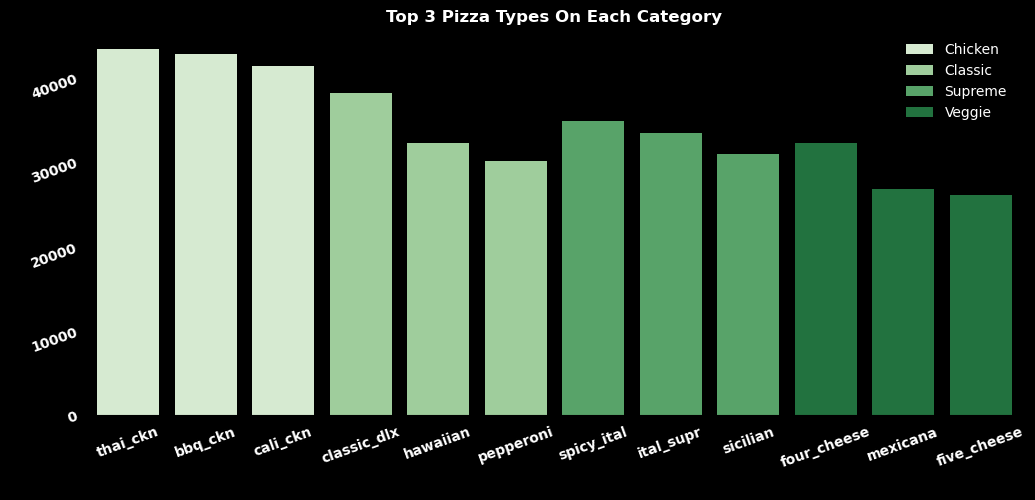

In [57]:
sql='''with cte as
(select category,p1.pizza_type_id,round(sum(quantity*price),2) as rev,
ROW_NUMBER()over(partition by category order by sum(quantity*price) desc) as df
from order_details as o
join pizzas as p
on o.pizza_id=p.pizza_id
join pizza_types as p1
on p.pizza_type_id=p1.pizza_type_id
group by category,p1.pizza_type_id)
select category,pizza_type_id,rev
from cte where df<=3'''
df=pd.read_sql_query(sql,conn)
plt.figure(figsize=(12,5),facecolor=("k"))
ax=sns.barplot(data=df,hue='category',y='rev',x='pizza_type_id',palette='Greens')
ax.set_facecolor("k")
plt.legend(frameon=False,labelcolor='w')
plt.title("Top 3 Pizza Types On Each Category",color='w',fontweight='bold')
plt.xticks(color='w',fontweight='bold',rotation=20)
plt.yticks(color='w',fontweight='bold',rotation=20)
plt.show()

## Percentage Of Sales By Pizza Category

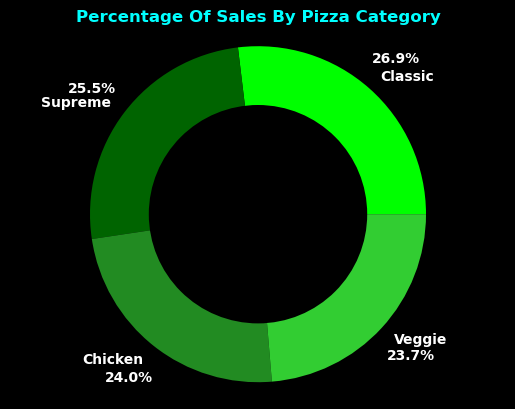

In [77]:
gp=dataset.groupby('category').agg(Total=('total','sum')).sort_values('Total',ascending=False).reset_index()
plt.figure(facecolor=('k'))
plt.pie(gp['Total'],labels=gp['category'],autopct="%0.1f%%",pctdistance=1.24,
            textprops={'color':'w','fontweight':'bold'},colors=['#00FF00','#006400','#228B22','#32CD32'])
cr=plt.Circle((0,0),0.65,color='k',fc='k',linewidth=0)
plt.gca().add_artist(cr)
plt.axis('equal')
plt.title("Percentage Of Sales By Pizza Category",color='cyan',fontweight='bold')
plt.show()

## List the top 7 most ordered pizza types along with their quantities.

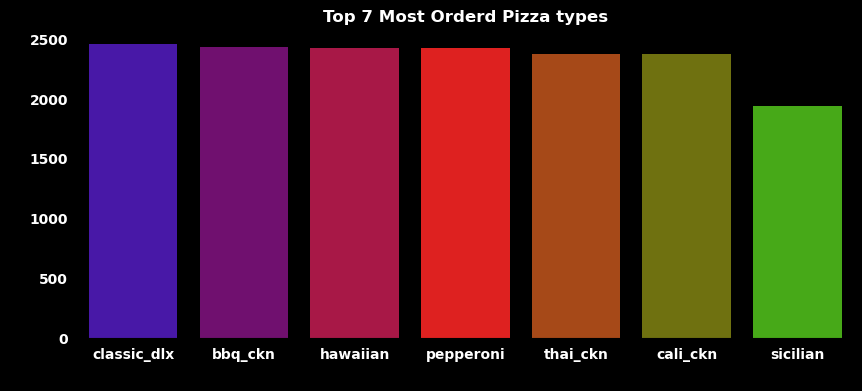

In [99]:
dataset.head(1)
gp=dataset.groupby('pizza_type_id').agg(Total=('quantity','sum')).sort_values('Total',ascending=False).reset_index().head(7)
plt.figure(facecolor=("k"),figsize=(10,4))
ax=sns.barplot(data=gp,x='pizza_type_id',y='Total',palette='brg')
ax.set_facecolor("k")
plt.title("Top 7 Most Orderd Pizza types",color='w',fontweight='bold')
plt.xticks(color='w',fontweight='bold')
plt.yticks(color='w',fontweight='bold')
plt.show()

## Determine the top 7 most ordered pizza types based on revenue.

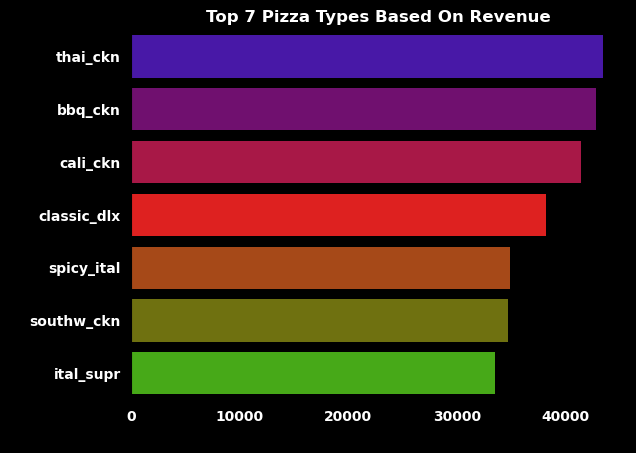

In [114]:
gp=dataset.groupby('pizza_type_id').agg(Total=('total','sum')).sort_values('Total',ascending=False).reset_index().head(7)
plt.figure(facecolor=("k"))
ax=sns.barplot(data=gp,y='pizza_type_id',x='Total',palette='brg')
ax.set_facecolor("k")
plt.xticks(color='w',fontweight='bold')
plt.yticks(color='w',fontweight='bold')
plt.title("Top 7 Pizza Types Based On Revenue",color='w',fontweight='bold')
plt.show()

## Percentage Sales By Pizza Size

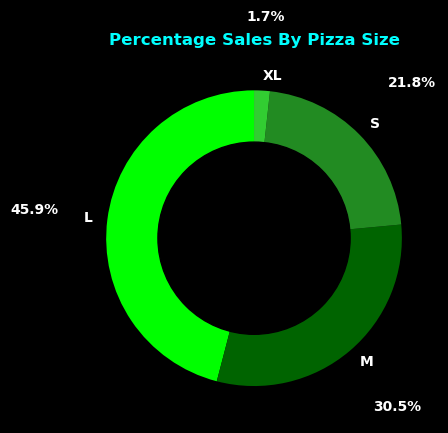

In [157]:
dataset.head(1)
gp=dataset.groupby('size').agg(Total=('total','sum')).sort_values('Total',ascending=False).reset_index().head(4)
plt.figure(facecolor=("k"))
plt.pie(gp['Total'],labels=gp['size'],autopct="%0.1f%%",startangle=90,pctdistance=1.50,
       textprops={'color':'w','fontweight':'bold'},colors=['#00FF00','#006400','#228B22','#32CD32'])
cr=plt.Circle((0,0),0.65,fc='k',color='k')
plt.gca().add_artist(cr)
plt.title("Percentage Sales By Pizza Size",color='cyan',fontweight='bold')
plt.show()

## Hour Wise Orders

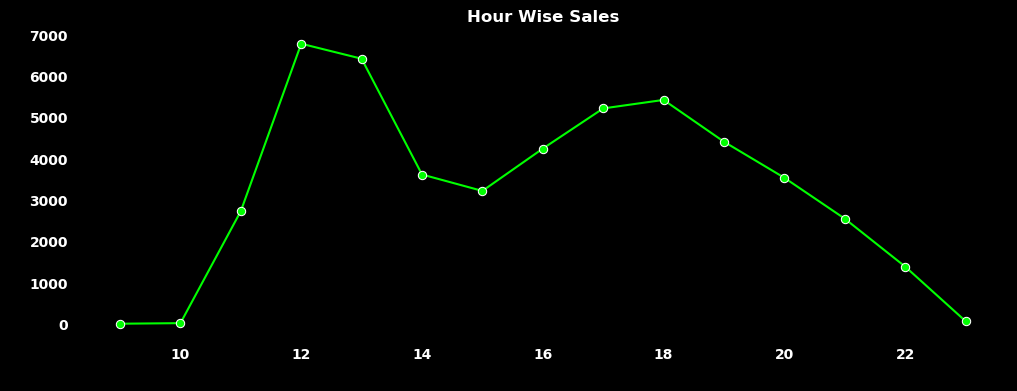

In [176]:
dataset['hour']=pd.to_datetime(dataset['time']).dt.hour
gp=dataset.groupby('hour').agg(Total=('quantity','sum')).sort_values('Total',ascending=True).reset_index()
plt.figure(facecolor=("k"),figsize=(12,4))
ax=sns.lineplot(data=gp,x='hour',y='Total',marker='o',color='#00FF00')
ax.set_facecolor("k")
plt.title("Hour Wise Sales",color='w',fontweight='bold')
plt.xticks(color='w',fontweight='bold')
plt.yticks(color='w',fontweight='bold')
plt.show()

## Weekday Wise Sales

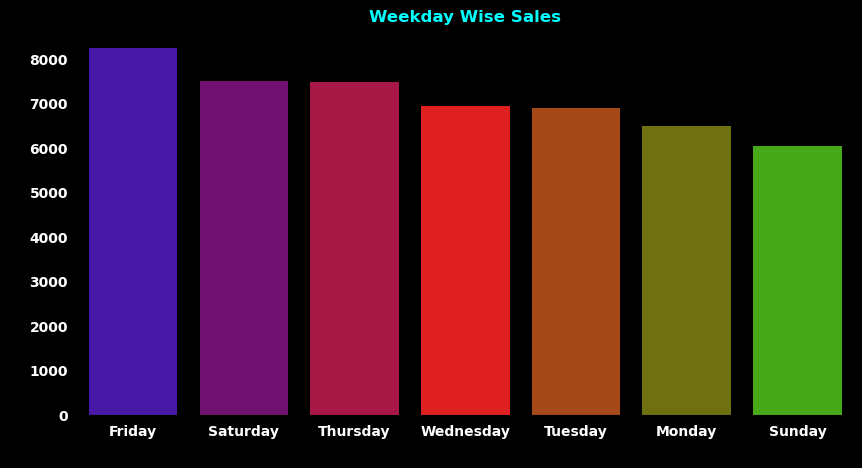

In [188]:
dataset['weekday']=pd.to_datetime(dataset['date']).dt.day_name()
gp=dataset.groupby('weekday').agg(Total=('quantity','sum')).sort_values('Total',ascending=False).reset_index()
plt.figure(figsize=(10,5),facecolor=("k"))
ax=sns.barplot(data=gp,x='weekday',y='Total',palette='brg')
ax.set_facecolor("k")
plt.title("Weekday Wise Sales",color='cyan',fontweight='bold')
plt.xticks(color='w',fontweight='bold')
plt.yticks(color='w',fontweight='bold')
plt.show()